In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
data = pd.read_csv('/content/Data.txt')

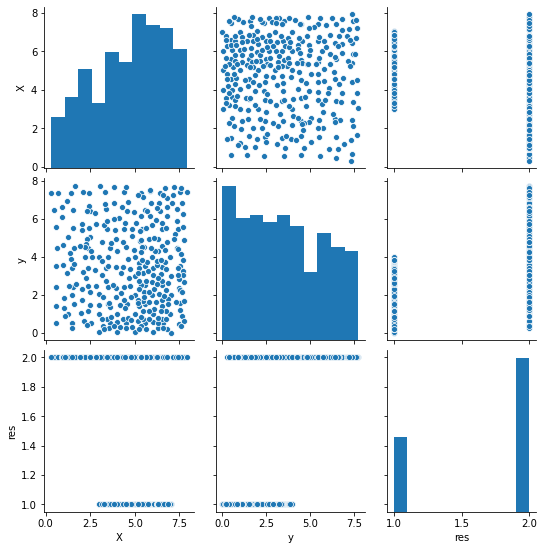

In [3]:
sns.pairplot(data)

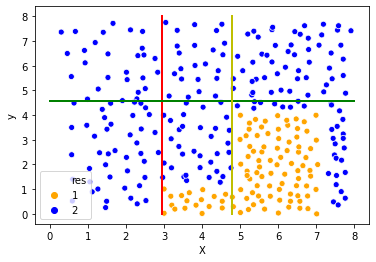

In [4]:
scplot = sns.scatterplot(data.X,data.y,hue=data.res,palette=['orange','blue'])
scplot.plot([2.937,2.937], [8,0], 'r-', linewidth = 2)
scplot.plot([0,8],[4.55,4.55],'g-',linewidth=2)
scplot.plot([4.79,4.79],[0,8],'y-',linewidth=2)

In [5]:
data.res.value_counts()

2    210
1    102
Name: res, dtype: int64

### now we have to visualize the info gain from the decision tree and the decision boundaries

In [0]:
# Using readlines() 
file1 = open('/content/Data.txt', 'r') 
Lines = file1.readlines() 

In [0]:
li_data = []
for line in Lines[1:]:
    li1 = [x for x in line.split(',')]
    li1[2] = li1[2][0]
    li1 = [float(x) for x in li1]
    li_data.append(li1)

In [0]:
len(li_data)
train_data = li_data[:220]
test_data = li_data[220:]

In [0]:
# Column labels.
# These are used only to print the tree.
header = ['X','y','classify']

In [0]:
def unique_vals(rows, col):
    """Find the unique values for a column in a dataset."""
    return set([row[col] for row in rows])

In [11]:
unique_vals(train_data, 2)

{1.0, 2.0}

In [0]:
def class_counts(rows):
    """Counts the number of each type of example in a dataset."""
    counts = {}  # a dictionary of label -> count.
    for row in rows:
        # in our dataset format, the label is always the last column
        label = row[-1]
        if label not in counts:
            counts[label] = 0
        counts[label] += 1
    return counts

In [13]:
#######
# Demo:
class_counts(train_data)
class_counts(test_data)
#######

{2.0: 92}

In [0]:
def is_numeric(value):
    """Test if a value is numeric."""
    return isinstance(value, int) or isinstance(value, float)


In [15]:
#######
# Demo:
is_numeric(7.1)
# is_numeric("Red")
#######

True

In [0]:

class Question:
    """A Question is used to partition a dataset.

    This class just records a 'column number' (e.g., 0 for Color) and a
    'column value' (e.g., Green). The 'match' method is used to compare
    the feature value in an example to the feature value stored in the
    question. See the demo below.
    """

    def __init__(self, column, value):
        self.column = column
        self.value = value

    def match(self, example):
        # Compare the feature value in an example to the
        # feature value in this question.
        val = example[self.column]
        if is_numeric(val):
            return val >= self.value
        else:
            return val == self.value

    def __repr__(self):
        # This is just a helper method to print
        # the question in a readable format.
        condition = "=="
        if is_numeric(self.value):
            condition = ">="
        return "Is %s %s %s?" % (
            header[self.column], condition, str(self.value))

In [17]:
q1 = Question(0,2.9377)
q1

Is X >= 2.9377?

In [18]:
q2 = Question(1,4.55)
q2

Is y >= 4.55?

In [19]:
q3 = Question(0,4.79)
q3

Is X >= 4.79?

In [0]:
def partition(rows, question):
    """Partitions a dataset.

    For each row in the dataset, check if it matches the question. If
    so, add it to 'true rows', otherwise, add it to 'false rows'.
    """
    true_rows, false_rows = [], []
    for row in rows:
        if question.match(row):
            true_rows.append(row)
        else:
            false_rows.append(row)
    return true_rows, false_rows

In [21]:
#######
# Demo:
# Let's partition the training data based on whether rows are Red.
true_rows, false_rows = partition(train_data, q1)
# This will contain all the 'Red' rows.
true_rows

[[6.99734982332156, 3.99381625441696, 1.0],
 [5.00971731448763, 3.99381625441696, 1.0],
 [5.00088339222615, 3.01325088339223, 1.0],
 [5.01855123674911, 2.01501766784452, 1.0],
 [5.01855123674911, 0.981448763250884, 1.0],
 [4.02031802120141, 0.981448763250884, 1.0],
 [3.00441696113074, 1.00795053003534, 1.0],
 [3.00441696113074, 0.0273851590106009, 1.0],
 [4.00265017667844, 0.0185512367491167, 1.0],
 [5.00971731448763, 0.0538869257950534, 1.0],
 [7.01501766784452, 0.000883392226148416, 1.0],
 [6.00795053003533, 0.0362190812720851, 1.0],
 [6.03445229681979, 0.990282685512368, 1.0],
 [5.9726148409894, 1.98851590106007, 1.0],
 [6.01678445229682, 3.04858657243816, 1.0],
 [5.99028268551237, 3.97614840989399, 1.0],
 [7.00618374558304, 2.98674911660777, 1.0],
 [7.04151943462897, 1.99734982332156, 1.0],
 [6.99734982332156, 0.990282685512368, 1.0],
 [6.57332155477032, 0.513250883392226, 1.0],
 [5.57508833922261, 0.52208480565371, 1.0],
 [4.53268551236749, 0.513250883392226, 1.0],
 [3.60512367491

In [22]:
# This will contain everything else.
false_rows
#######

[[2.50088339222615, 1.47614840989399, 2.0],
 [2.5273851590106, 0.539752650176679, 2.0],
 [1.49381625441696, 0.513250883392226, 2.0],
 [0.592756183745583, 0.52208480565371, 2.0],
 [0.601590106007067, 1.40547703180212, 2.0],
 [0.575088339222614, 2.39487632508834, 2.0],
 [1.53798586572438, 2.43021201413428, 2.0],
 [2.39487632508834, 2.44787985865725, 2.0],
 [1.5821554770318, 1.49381625441696, 2.0],
 [0.575088339222614, 3.49911660777385, 2.0],
 [1.50265017667844, 3.42844522968198, 2.0],
 [2.40371024734982, 3.43727915194346, 2.0],
 [2.39487632508834, 4.47968197879859, 2.0],
 [1.59982332155477, 4.47968197879859, 2.0],
 [0.636925795053004, 4.48851590106007, 2.0],
 [0.56625441696113, 5.55742049469965, 2.0],
 [1.5291519434629, 5.52208480565371, 2.0],
 [2.44787985865724, 5.50441696113074, 2.0],
 [2.4743816254417, 6.43197879858657, 2.0],
 [1.5291519434629, 6.47614840989399, 2.0],
 [0.460247349823322, 6.49381625441696, 2.0],
 [0.67226148409894, 7.38604240282686, 2.0],
 [1.40547703180212, 7.3507067

In [0]:
def gini(rows):
    """Calculate the Gini Impurity for a list of rows.
    There are a few different ways to do this, I thought this one was
    the most concise. See:
    https://en.wikipedia.org/wiki/Decision_tree_learning#Gini_impurity
    """
    counts = class_counts(rows)
    impurity = 1
    for lbl in counts:
        prob_of_lbl = counts[lbl] / float(len(rows))
        impurity -= prob_of_lbl**2
    return impurity

In [24]:
# this will return 0.5 - meaning, there's a 50% chance of misclassifying
gini(train_data)

0.4973553719008264

In [25]:
#this return 0 as the test data has no impurity, thus only one label is present there 
gini(test_data)

0.0

In [0]:
igX = []
igY = [] 
ig = []

In [0]:
def info_gain(left, right, current_uncertainty):
    """Information Gain.
    The uncertainty of the starting node, minus the weighted impurity of
    two child nodes.
    """
    p = float(len(left)) / (len(left) + len(right))
    return current_uncertainty - p * gini(left) - (1 - p) * gini(right)

In [28]:
# Demo:
# Calculate the uncertainy of our training data.
current_uncertainty = gini(train_data)
current_uncertainty

0.4973553719008264

In [29]:
# How much information do we gain by partioning on q1?
true_rows, false_rows = partition(train_data, q1)
info_gain(true_rows, false_rows, current_uncertainty)

0.13985263367519657

In [0]:
def find_best_split(rows):
    """Find the best question to ask by iterating over every feature / value
    and calculating the information gain."""
    best_gain = 0  # keep track of the best information gain
    best_question = None  # keep train of the feature / value that produced it
    current_uncertainty = gini(rows)
    n_features = len(rows[0]) - 1  # number of columns

    for col in range(n_features):  # for each feature

        values = set([row[col] for row in rows])  # unique values in the column

        for val in values:  # for each value

            question = Question(col, val)

            # try splitting the dataset
            true_rows, false_rows = partition(rows, question)

            # Skip this split if it doesn't divide the
            # dataset.
            if len(true_rows) == 0 or len(false_rows) == 0:
                continue

            # Calculate the information gain from this split
            gain = info_gain(true_rows, false_rows, current_uncertainty)
            ig.append(gain)
            # You actually can use '>' instead of '>=' here
            # but I wanted the tree to look a certain way for our
            # toy dataset.
            if gain >= best_gain:
                best_gain, best_question = gain, question

    return best_gain, best_question

In [31]:

#######
# Demo:
# Find the best question to ask first for our toy dataset.
best_gain, best_question = find_best_split(train_data)
best_question
# FYI: is color == Red is just as good. See the note in the code above
# where I used '>='.
#######

Is X >= 4.79770318021201?

In [32]:
#now i want to check the info gain for the best first question
true_rows, false_rows = partition(li_data, best_question)
info_gain(true_rows, false_rows, current_uncertainty)


0.1286757550072925

In [0]:
class Leaf:
    """A Leaf node classifies data.

    This holds a dictionary of class (e.g., "Apple") -> number of times
    it appears in the rows from the training data that reach this leaf.
    """

    def __init__(self, rows):
        self.predictions = class_counts(rows)

In [0]:

class Decision_Node:
    """A Decision Node asks a question.

    This holds a reference to the question, and to the two child nodes.
    """

    def __init__(self,
                 question,
                 true_branch,
                 false_branch):
        self.question = question
        self.true_branch = true_branch
        self.false_branch = false_branch

In [0]:
c=0

In [0]:

def build_tree(rows):
    """Builds the tree.

    Rules of recursion: 1) Believe that it works. 2) Start by checking
    for the base case (no further information gain). 3) Prepare for
    giant stack traces.
    """

    # Try partitioing the dataset on each of the unique attribute,
    # calculate the information gain,
    # and return the question that produces the highest gain.
    gain, question = find_best_split(rows)

    # Base case: no further info gain
    # Since we can ask no further questions,
    # we'll return a leaf.
    if gain == 0:
        return Leaf(rows)
    print(question)
    # If we reach here, we have found a useful feature / value
    # to partition on.
    true_rows, false_rows = partition(rows, question)

    # Recursively build the true branch.
    true_branch = build_tree(true_rows)

    # Recursively build the false branch.
    false_branch = build_tree(false_rows)

    # Return a Question node.
    # This records the best feature / value to ask at this point,
    # as well as the branches to follow
    # dependingo on the answer.
    return Decision_Node(question, true_branch, false_branch)

In [37]:
"""#now we want to develop a tree with the tree questions 

#for q1
t1,f1 = partition(train_data,q1)
gini(t1)
gini(f1) #0

#this means i have to split only tb1
if(gini(t1) == 0)
"""


'#now we want to develop a tree with the tree questions \n\n#for q1\nt1,f1 = partition(train_data,q1)\ngini(t1)\ngini(f1) #0\n\n#this means i have to split only tb1\nif(gini(t1) == 0)\n'

In [0]:

def print_tree(node, spacing=""):
    """World's most elegant tree printing function."""

    # Base case: we've reached a leaf
    if isinstance(node, Leaf):
        print (spacing + "Predict", node.predictions)
        return

    # Print the question at this node
    print (spacing + str(node.question))

    # Call this function recursively on the true branch
    print (spacing + '--> True:')
    print_tree(node.true_branch, spacing + "  ")

    # Call this function recursively on the false branch
    print (spacing + '--> False:')
    print_tree(node.false_branch, spacing + "  ")

In [39]:
my_tree = build_tree(train_data)

Is X >= 4.79770318021201?
Is y >= 4.4708480565371?
Is X >= 7.45671378091873?
Is y >= 1.04328621908127?
Is X >= 3.00441696113074?


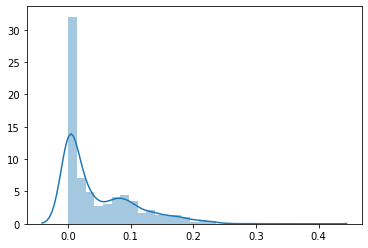

In [40]:
len(ig)
train_data
X = []
y = []
for elem in train_data:
  X.append(elem[0])
  y.append(elem[1])
len(X)
sns.distplot(ig)

In [41]:
print_tree(my_tree)


Is X >= 4.79770318021201?
--> True:
  Is y >= 4.4708480565371?
  --> True:
    Predict {2.0: 12}
  --> False:
    Is X >= 7.45671378091873?
    --> True:
      Predict {2.0: 4}
    --> False:
      Predict {1.0: 84}
--> False:
  Is y >= 1.04328621908127?
  --> True:
    Predict {2.0: 95}
  --> False:
    Is X >= 3.00441696113074?
    --> True:
      Predict {1.0: 18}
    --> False:
      Predict {2.0: 7}


In [0]:
def classify(row, node):
    """See the 'rules of recursion' above."""

    # Base case: we've reached a leaf
    if isinstance(node, Leaf):
        return node.predictions

    # Decide whether to follow the true-branch or the false-branch.
    # Compare the feature / value stored in the node,
    # to the example we're considering.
    if node.question.match(row):
        return classify(row, node.true_branch)
    else:
        return classify(row, node.false_branch)

In [43]:

#######
# Demo:
# The tree predicts the 1st row of our
# training data is an apple with confidence 1.
classify(train_data[0], my_tree)
#######

{1.0: 84}

In [0]:
def print_leaf(counts):
    """A nicer way to print the predictions at a leaf."""
    total = sum(counts.values()) * 1.0
    probs = {}
    for lbl in counts.keys():
        probs[lbl] = str(int(counts[lbl] / total * 100)) + "%"
    return probs

In [45]:

#######
# Demo:
# Printing that a bit nicer
print_leaf(classify(li_data[0], my_tree))
#######

{1.0: '100%'}

In [0]:
true = 0
false = 0

In [47]:
for row in test_data:
  actual = row[-1]
  pred = print_leaf(classify(row, my_tree))
  if actual == list(pred)[0]: 
    true+=1
  else:
    false+=1
  print ("Actual: %s. Predicted: %s" % (actual, pred))


Actual: 2.0. Predicted: {2.0: '100%'}
Actual: 2.0. Predicted: {2.0: '100%'}
Actual: 2.0. Predicted: {2.0: '100%'}
Actual: 2.0. Predicted: {2.0: '100%'}
Actual: 2.0. Predicted: {2.0: '100%'}
Actual: 2.0. Predicted: {2.0: '100%'}
Actual: 2.0. Predicted: {2.0: '100%'}
Actual: 2.0. Predicted: {2.0: '100%'}
Actual: 2.0. Predicted: {2.0: '100%'}
Actual: 2.0. Predicted: {2.0: '100%'}
Actual: 2.0. Predicted: {2.0: '100%'}
Actual: 2.0. Predicted: {2.0: '100%'}
Actual: 2.0. Predicted: {2.0: '100%'}
Actual: 2.0. Predicted: {2.0: '100%'}
Actual: 2.0. Predicted: {2.0: '100%'}
Actual: 2.0. Predicted: {2.0: '100%'}
Actual: 2.0. Predicted: {2.0: '100%'}
Actual: 2.0. Predicted: {2.0: '100%'}
Actual: 2.0. Predicted: {1.0: '100%'}
Actual: 2.0. Predicted: {2.0: '100%'}
Actual: 2.0. Predicted: {2.0: '100%'}
Actual: 2.0. Predicted: {1.0: '100%'}
Actual: 2.0. Predicted: {2.0: '100%'}
Actual: 2.0. Predicted: {2.0: '100%'}
Actual: 2.0. Predicted: {2.0: '100%'}
Actual: 2.0. Predicted: {2.0: '100%'}
Actual: 2.0.

In [0]:
true,false
accuracy = (true/(true+false))*100

In [49]:
print("the accuracy of our model from scratch is : ", accuracy)

the accuracy of our model from scratch is :  89.13043478260869


the accuracy with model from sklearn :  0.9841269841269841


[Text(209.25, 190.26, 'X[1] <= 4.007\ngini = 0.436\nsamples = 249\nvalue = [80, 169]'),
 Text(167.4, 135.9, 'X[0] <= 4.793\ngini = 0.498\nsamples = 151\nvalue = [80, 71]'),
 Text(83.7, 81.53999999999999, 'X[1] <= 1.074\ngini = 0.251\nsamples = 68\nvalue = [10, 58]'),
 Text(41.85, 27.180000000000007, 'gini = 0.494\nsamples = 18\nvalue = [10, 8]'),
 Text(125.55000000000001, 27.180000000000007, 'gini = 0.0\nsamples = 50\nvalue = [0, 50]'),
 Text(251.10000000000002, 81.53999999999999, 'X[0] <= 7.17\ngini = 0.264\nsamples = 83\nvalue = [70, 13]'),
 Text(209.25, 27.180000000000007, 'gini = 0.0\nsamples = 70\nvalue = [70, 0]'),
 Text(292.95, 27.180000000000007, 'gini = 0.0\nsamples = 13\nvalue = [0, 13]'),
 Text(251.10000000000002, 135.9, 'gini = 0.0\nsamples = 98\nvalue = [0, 98]')]

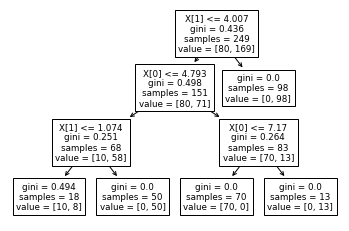

In [50]:
X = data.drop('res',axis=1)
y = data['res']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(max_depth=3,criterion='gini')
clf.fit(X_train,y_train)
print("the accuracy with model from sklearn : ", clf.score(X_test,y_test))

from sklearn.tree import plot_tree
plot_tree(clf)